<a href="https://colab.research.google.com/github/nguyentrituan/portfolio_data_science/blob/main/Linear_regression_Predicting_Custumer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 3 - Ex2: Predicting Custumer Churn


- Cho dữ liệu Churn_Modelling.csv chứa thông tin của 10000 khách hàng của công ty.
- Là phụ trách bộ phận chăm sóc khách hàng bạn nhận thấy việc phải xây dựng một mô hình Machine Learning để dự đoán việc khách hàng sẽ ra đi hay ở lại. Công việc này vô cùng quan trọng vì giữ chân được khách hàng càng lâu doanh nghiệp của bạn sẽ càng tiết kiệm được chi phí và tăng doanh thu.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dựa trên thông tin trên ta thấy các cột không dùng trong model là:
# RowNumber, CustomerId, Surname
# inputs: các cột còn lại trừ cột Exited
# output: cột Exited

In [ ]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.where(y==0).count() # khách hàng ở lại

7963

In [ ]:
y.where(y==1).count() # khách hàng ra đi

2037

In [ ]:
# Các thuộc tinh phân loại
objects = [f for f in X.columns if X.dtypes[f] == 'object']
objects

['Geography', 'Gender']

In [ ]:
# Xem xét thuộc tính phân loại: Geography
X.groupby(by='Geography')['CreditScore'].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: CreditScore, dtype: int64

In [ ]:
# Dựa trên kết quả ta thấy có 3 quốc gia
# => cần chuyển sang dữ liệu kiểu số

In [ ]:
# Xem xét thuộc tính phân loại: Gender
X.groupby(by='Gender')['CreditScore'].count()

Gender
Female    4543
Male      5457
Name: CreditScore, dtype: int64

In [ ]:
# Dựa trên kết quả ta thấy có 2 giới tính
# => cần chuyển sang dữ liệu kiểu số

In [ ]:
X_new = pd.get_dummies(X)

In [ ]:
X_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [ ]:
# X_new_1 = sc.fit_transform(X_new)

#Áp dụng model, nhận xét kết quả

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('Train score: ', lr.score(X_train,y_train))

Train score:  0.790125


In [ ]:
print('Test score: ', lr.score(X_test,y_test))

Test score:  0.789


In [ ]:
yhat_test = lr.predict(X_test)
yhat_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print("Test Accuracy is ", accuracy_score(y_test,yhat_test)*100,"%")

Test Accuracy is  78.9 %


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
cm = confusion_matrix(y_test, yhat_test)

In [ ]:
cm

array([[1553,   42],
       [ 380,   25]])

In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
# Print ROC_AUC score using probabilities
probs = lr.predict_proba(X_test)

In [ ]:
scores = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

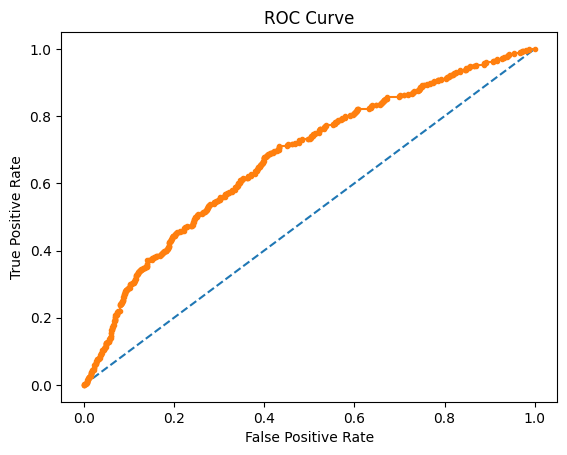

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
auc(fpr, tpr)

0.6735399976779287

##Predicting new samples

In [ ]:
## Cần phải chuẩn hóa dữ liệu để mẫu mới có cùng cấu trúc với dữ liệu đang có

In [ ]:
columns = X_new.columns
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
new_samples = X.iloc[[0, 1, 2]]

In [ ]:
new_samples = pd.get_dummies(new_samples)

In [ ]:
new_samples.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Spain', 'Gender_Female'],
      dtype='object')

In [ ]:
missing_cols = set(X_new.columns) - set(new_samples.columns)
missing_cols

{'Gender_Male', 'Geography_Germany'}

In [ ]:
for c in missing_cols: new_samples[c] = 0
# Ensure the order of column in the test set # is in the same order than in train set
new_samples = new_samples[X_new.columns]

In [ ]:
new_samples.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
new_samples.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0


In [ ]:
new_predictions = lr.predict(new_samples)
new_predictions

array([0, 0, 0])

In [ ]:
# Nhận xét kết quả
# Có giải pháp nào giúp cho kết quả cải thiện hơn không?

#Giải pháp

##Đề xuất 1: Điều chỉnh ngưỡng

In [ ]:
# Dự đoán xác suất khách hàng bỏ đi
pos_label= 1
pos_index= np.where(lr.classes_ == pos_label)[0][0]
neg_index= np.where(lr.classes_ != pos_label)[0][0]
neg_label= lr.classes_[neg_index]
# Dự đoán xác xuất
y_predict_proba= lr.predict_proba(X_test)
# Tách xác xuất khách hàng bỏ đi
pos_proba= y_predict_proba[:, pos_index]

In [ ]:
import seaborn as sns

<ipython-input-58-cbf9cda22f7a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_proba[y_test== pos_label], label= pos_label,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-58-cbf9cda22f7a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

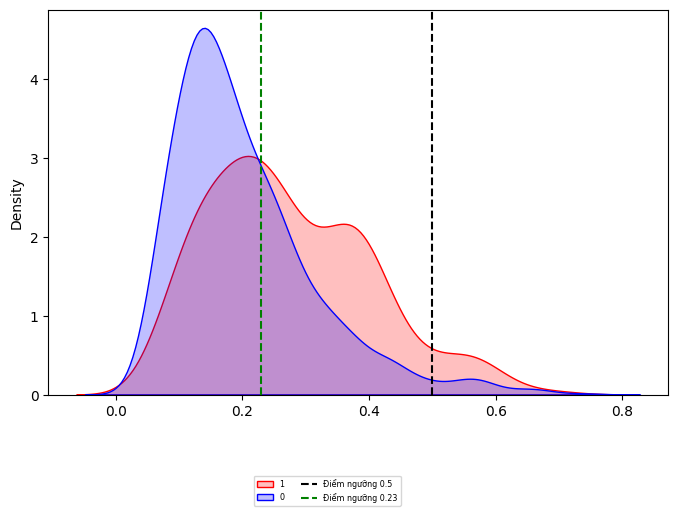

In [ ]:
# Trực quan phân phối xác suất khách hàng ra đi để điều chỉnh điểm ngưỡng
plt.figure(figsize= (8, 5))
sns.distplot(pos_proba[y_test== pos_label], label= pos_label,
                              color= 'r', kde_kws={"shade": True}, hist=False, norm_hist= True)
sns.distplot(pos_proba[y_test== neg_label], label= neg_label,
                              color= 'b', kde_kws={"shade": True}, hist=False, norm_hist= True)
plt.axvline(x= 0.5, linestyle= '--', color= 'black', label= 'Điểm ngưỡng 0.5')
plt.axvline(x= 0.23, linestyle= '--', color= 'g', label= 'Điểm ngưỡng 0.23', )
plt.legend(fontsize= 'xx-small', bbox_to_anchor=(0.3, -0.3, 0.3, 0.2),
                                            ncol=2, loc='lower center')
plt.show()

In [ ]:
y_hat_test_pro = lr.predict_proba(X_test)

In [ ]:
y_hat_test_pro[:5]

array([[0.78264769, 0.21735231],
       [0.66502929, 0.33497071],
       [0.81455616, 0.18544384],
       [0.90736674, 0.09263326],
       [0.81681354, 0.18318646]])

In [ ]:
y_hat_now = y_hat_test_pro[:,1] > 0.23
print(y_hat_now)

[False  True False ...  True False False]


In [ ]:
print("Test Accuracy is ", accuracy_score(y_test,y_hat_now)*100,"%")

Test Accuracy is  66.0 %


In [ ]:
cm1 = confusion_matrix(y_test, y_hat_now)
cm1

array([[1089,  506],
       [ 174,  231]])

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_hat_now)

In [ ]:
auc(fpr1, tpr1)

0.6265644955300129

##Predicting new samples with new threshold

In [ ]:
lr.predict_proba(new_samples)[:,1]>0.23

array([False,  True,  True])

In [ ]:
# Nhận xét kết quả
# Có giải pháp nào giúp cho kết quả cải thiện hơn không?

#Đề xuất 2: Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
# method = SMOTE(kind='borderline1')
method = SMOTE(sampling_strategy='auto')

In [ ]:
# Apply resampling to the training data only
# X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [ ]:
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

In [ ]:
# Count the occurrences of fraud and no fraud and print them
occ_no = y_resampled[y_resampled==0].size
print(occ_no)

6368


In [ ]:
occ_fraud = y_resampled[y_resampled==1].size
print(occ_fraud)

6368


In [ ]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
# training score
model.score(X_resampled, y_resampled)

0.6830244974874372

In [ ]:
# testing score
model.score(X_test, y_test)

0.665

In [ ]:
# Get your performance metrics
y_pred = model.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[1083  512]
 [ 158  247]]


In [ ]:
# Print ROC_AUC score using probabilities
probs = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
scores = model. predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

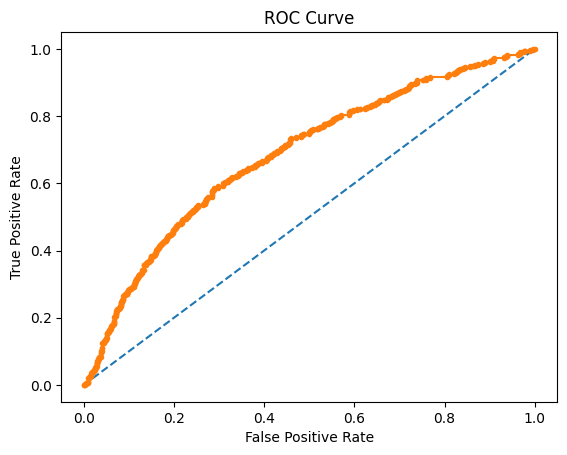

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
auc(fpr, tpr)

##Predicting new samples

In [ ]:
new_predictions = model.predict(new_samples)
new_predictions

array([1, 1, 1])

Kết luận:
Kết quả nào phù hợp hơn với bài toán này? Tại sao?
Nếu chưa tìm được giải pháp nào phù hợp hơn thì có thể nghĩ đến việc phải thay đổi thuật toán (sẽ học sau)